In [1]:
### importing required resources
import pandas as pd
import numpy as np
from sympy import S, symbols, printing
from matplotlib import pyplot as plt
import datetime
import seaborn as sns

In [11]:
### specifying file location
file2 = 'C:/Users/jaska/Desktop/londes_tile.xlsx'

In [12]:
### reading the file into dataframe
obs_tile = pd.read_excel(file2)

In [13]:
### getting info about dataframe size and type
obs_tile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210176 entries, 0 to 210175
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     210176 non-null  datetime64[ns]
 1   tile_mm  210176 non-null  float64       
 2   surf_mm  210004 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.8 MB


In [14]:
# looking at the shape of the df
obs_tile.shape

(210176, 3)

In [15]:
# dropping all rows with missing values
obs_tile.dropna(how='any', inplace=True, axis=0)

In [16]:
# looking at the shape of the df
obs_tile.shape

(210004, 3)

In [17]:
obs_tile.head()

,date,tile_mm,surf_mm
0,2011-10-03 16:00:00,0.0,0.0
1,2011-10-03 16:15:00,0.0,0.0
2,2011-10-03 16:30:00,0.0,0.0
3,2011-10-03 16:45:00,0.0,0.0
4,2011-10-03 17:00:00,0.0,0.0


In [18]:
obs_tile.tail()

,date,tile_mm,surf_mm
210171,2017-09-30 22:45:00,0.003904,0.0
210172,2017-09-30 23:00:00,0.003904,0.0
210173,2017-09-30 23:15:00,0.003904,0.0
210174,2017-09-30 23:30:00,0.003904,0.0
210175,2017-09-30 23:45:00,0.003904,0.0


In [19]:
# Let us look at daily data
# but first we need to get total values added over each day

### setting date as index in the data set
obs_tile.set_index('date')

### resampling data so that we have monthly added values
daily_tile = obs_tile.resample('D', on='date').sum()

### dropping empty rows in newly created data set
daily_tile.dropna(axis = 0, how = 'any', inplace=True)

# looking at new df
daily_tile.head()

,tile_mm,surf_mm
date,,
2011-10-03,0.0,0.0
2011-10-04,0.0,0.0
2011-10-05,0.0,0.0
2011-10-06,0.0,0.0
2011-10-07,0.0,0.0


In [20]:
daily_tile.shape

(2190, 2)

In [25]:
# it will be interesting to see what is going on in the winters
# from our earlier data exploration, we found that Dec-Mar is when soil is most cold at 10 cm at Londes site

### dividing the daily dataset into different months
jan1 = obs_tile.loc[obs_tile['date'].dt.month == 1]
feb1 = obs_tile.loc[obs_tile['date'].dt.month == 2]
mar1 = obs_tile.loc[obs_tile['date'].dt.month == 3]
dec1 = obs_tile.loc[obs_tile['date'].dt.month == 12]

In [26]:
# combining winter months into one df
winter = pd.concat([dec1, jan1, feb1, mar1], ignore_index = True)

In [27]:
# Let us look at daily data in winters
# but first we need to get total values added over each day

### setting date as index in the data set
winter.set_index('date')

### resampling data so that we have monthly added values
daily_winter = winter.resample('D', on='date').sum()

### dropping empty rows in newly created data set
daily_winter.dropna(axis = 0, how = 'any', inplace=True)

# looking at new df
daily_winter.head()

,tile_mm,surf_mm
date,,
2011-12-01,7.346879,0.0
2011-12-02,2.597186,0.0
2011-12-03,1.750384,0.0
2011-12-04,6.313940,0.0
2011-12-05,8.965321,0.0


In [28]:
daily_winter.shape

(1948, 2)

Text(0, 0.5, 'tile flow contribution to stream in mm')

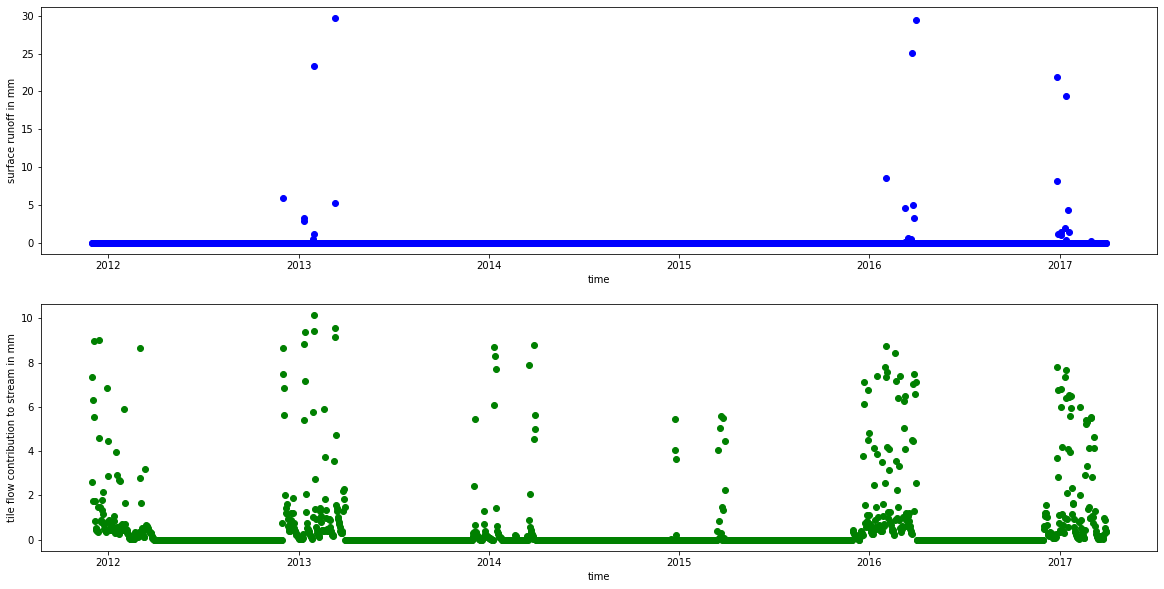

In [36]:
### plotting time series for winter months in all years

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.scatter(daily_winter.index.values, daily_winter.surf_mm, c='b')
plt.xlabel('time')
plt.ylabel('surface runoff in mm')
plt.subplot(2,1,2)
plt.scatter(daily_winter.index.values, daily_winter.tile_mm, c='g')
plt.xlabel('time')
plt.ylabel('tile flow contribution to stream in mm')

In [37]:
# getting a dataset when tile event occured
daily_winter_tile = daily_winter.loc[daily_winter['tile_mm']>0]

In [39]:
# total number of days in winter
outof = daily_winter.shape[0]
print(outof)

1948


In [40]:
# total number of days in winter when tiles ran
tiledays=daily_winter_tile.shape[0]
print(tiledays)

570


In [41]:
# percentage of days when tiles flow in winter
tileflowpct = 100*(tiledays/outof)
print(tileflowpct, '% of the winter days, the tiles were running.')

29.26078028747433 % of the winter days, the tiles were running.
